In [5]:
from model import *
from utils import *
import pandas as pd
import pickle
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore', category=Warning)

In [6]:
#parser = argparse.ArgumentParser()
#parser.add_argument('--fpath', default='/contextual_topic_identification/data/steam_reviews.csv')
#parser.add_argument('--ntopic', default=10)
#parser.add_argument('--method', default='TFIDF')
#parser.add_argument('--samp_size', default=10000)
#args = parser.parse_args()

fpath = '../data/steam_reviews.csv'
ntopic = 10
method = 'TFIDF'
samp_size = 10000

Preprocessing raw texts ...
Preprocessing raw texts. Done!
Clustering embeddings ...
Getting vector representations for TF-IDF ...
Getting vector representations for TF-IDF. Done!
Clustering embeddings. Done!
Coherence: 0.5747935924917169
Silhouette Score: 0.0030906134299685923
Calculating UMAP projection ...
Calculating UMAP projection. Done!


PermissionError: [Errno 13] Permission denied: '/contextual_topic_identification'

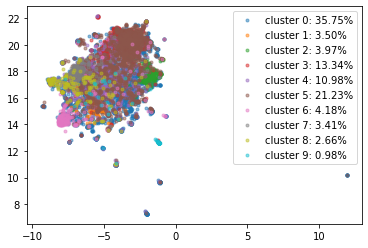

In [7]:
data = pd.read_csv(fpath)
data = data.fillna('')  # only the comments has NaN's
rws = data.review
sentences, token_lists, idx_in = preprocess(rws, samp_size=samp_size)
# Define the topic model object
tm = Topic_Model(k = ntopic, method = method)
# Fit the topic model by chosen method
tm.fit(sentences, token_lists)
# Evaluate using metrics
with open("../docs/saved_models/steam/{}.file".format(tm.id), "wb") as f:
    pickle.dump(tm, f, pickle.HIGHEST_PROTOCOL)

print('Coherence:', get_coherence(tm, token_lists, 'c_v'))
print('Silhouette Score:', get_silhouette(tm))
# visualize and save img
visualize(tm)
for i in range(tm.k):
    get_wordcloud(tm, token_lists, i)